# Monday, November 18th, 2024

## Returning to Conway's Game of Life

How might we visualize the data generated through Conway's Game of Life?

First, let's borrow code from last week:

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def count_live_neighbors(cells,i,j):
    # Similar to the Image Denoising project, let's build a padded version of cells:
    nrows, ncols = cells.shape   # Get number of rows and columns of cells
    padded_cells = np.zeros((nrows + 2, ncols +2), dtype=int)
    padded_cells[1:-1, 1:-1] = cells      # Inset the cells array inside the padded cells
    
    grid = padded_cells[i:i+3, j:j+3] # Get a 3x3 grid centered on cell i,j from the padded array

    live_neighbors = np.sum(grid) - grid[1,1] # Add the live neighbors (including the cell itself)
                                              # and subtract the cell itself.
        
    return live_neighbors

In [14]:
def update_cells(cells):
    updated_cells = cells.copy()
    
    nrows, ncols = cells.shape
    for i in range(nrows):
        for j in range(ncols):
            live_neighbors = count_live_neighbors(cells,i,j)
            # Rule 1
            if cells[i,j] == 1:  # If the cell is alive:
                if (live_neighbors == 2) or (live_neighbors == 3):
                    updated_cells[i,j] = 1
                else:
                    updated_cells[i,j] = 0
            # Rule 2
            if cells[i,j] == 0: # If the cell is not alive:
                if (live_neighbors == 3):
                    updated_cells[i,j] = 1
                else:
                    updated_cells[i,j] = 0
            # Rule 3
            # If neither of the above rules applied, don't change anything

    return updated_cells

In [15]:
%matplotlib qt
from matplotlib.animation import FuncAnimation

In [16]:
cells = np.zeros((50,50),dtype=int)
live_mask = np.random.random(cells.shape) < 0.4
cells[live_mask] = 1

fig = plt.figure()
im = plt.imshow(cells,vmin=0,vmax=1)               # Generate the initial plot

def animate(i):
    updated_cells = update_cells(cells)        # Get updated cells
    cells[:,:] = updated_cells
    im.set_data(cells)                             # Update the figure with new x array
    return im

anim = FuncAnimation(fig, animate, cache_frame_data=False)
plt.show()

Let's write a function that takes in an initial configuration `cells_0` and an integer `T`, and applies the Game of Life rule's to update `cells_0` `T` times, preserving the entire history of configurations.

In this function:
 - `cells_0` is a 2D array containing the initial configuration
 - `cells` is a 3D dimensional array, where `cells[:,:,k]` is the configuration at time step `k`

In [29]:
%matplotlib inline

In [30]:
def run_game_of_life(cells_0, T):
    nrows, ncols = cells_0.shape
    
    cells = np.zeros((nrows,ncols,T+1))  # Build an array for us to fill with data
    cells[:,:,0] = cells_0               # Set the initial configuration
    
    for k in range(T):
        # We will plug the kth configuration, cells[:,:,k], into `update_cells`
        # and store the result as the (k+1)st configuration, cells[:,:,k+1]
        cells[:,:,k+1] = update_cells(cells[:,:,k])
        
    return cells

In [18]:
cells_0 = np.zeros((50,50),dtype=int)
live_mask = np.random.random(cells_0.shape) < 0.4
cells_0[live_mask] = 1

In [25]:
T = 300

cells = run_game_of_life(cells_0,T)

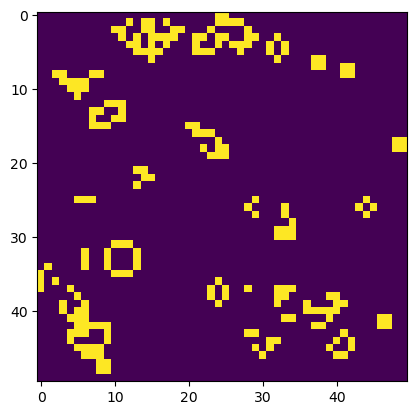

In [31]:
plt.imshow(cells[:,:,100])

We could create a figure with various snapshots as subplots:

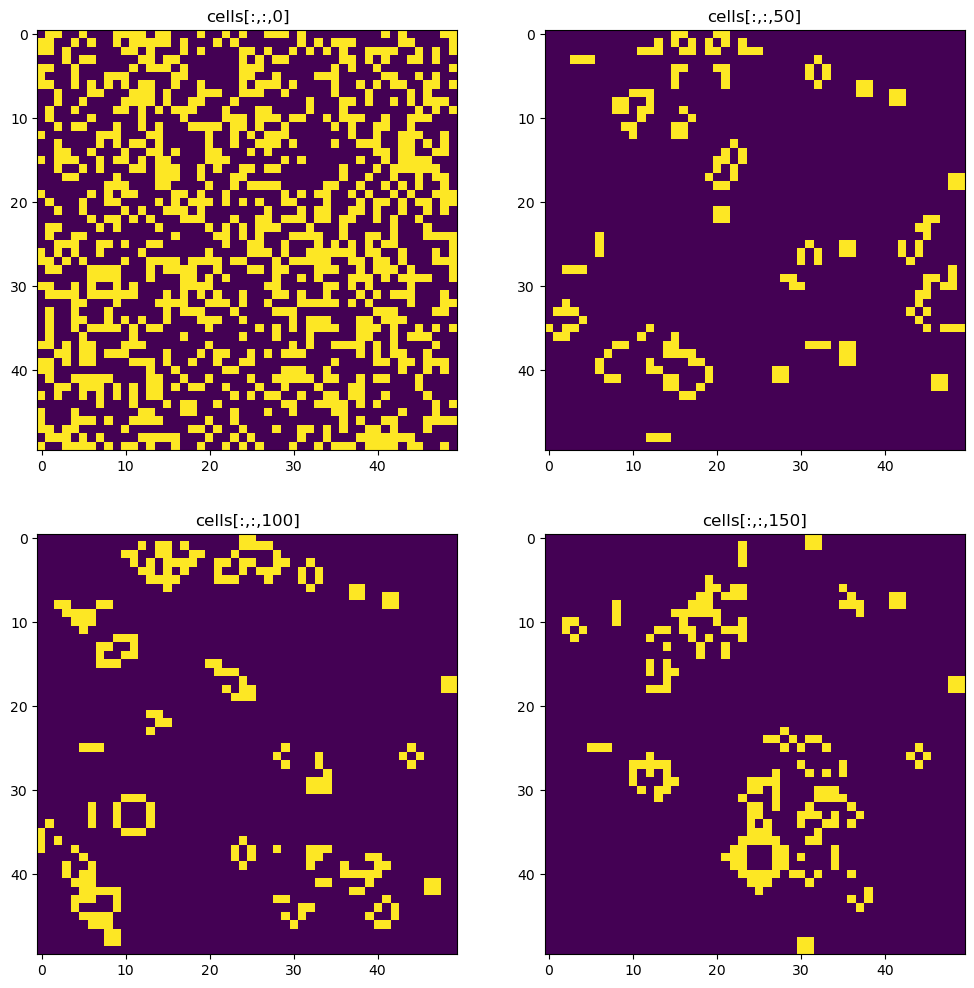

In [32]:
t_list = [0, 50, 100, 150]  # list of time slices we want to see

plt.figure(figsize=(12,12))

for i, t in enumerate(t_list):
    plt.subplot(2,2,i+1)
    
    plt.imshow(cells[:,:,t])
    
    plt.title('cells[:,:,{:}]'.format(t))

Let's try something different. At each time slice, let's count the total number of living cells. We can then plot these counts versus time.

In [33]:
live_cell_counts = []

for t in range(T+1):
    count = (cells[:,:,t] == 1).sum()  # Count how many cells are currently alive
    live_cell_counts.append(count)

Text(0.5, 1.0, 'Cell population through Game of Life')

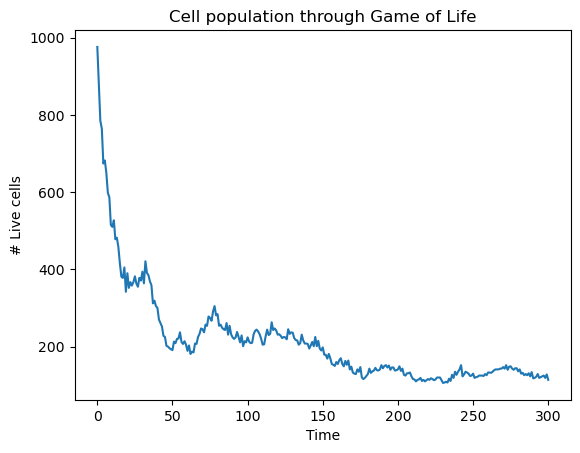

In [34]:
plt.plot(live_cell_counts)

plt.xlabel('Time')
plt.ylabel('# Live cells')
plt.title('Cell population through Game of Life')

Let's run this simulation several times, with different randomly generated initial data, then plot the live cell counts for each run together.

In [35]:
def count_live_cells(cells):
    live_cell_counts = []

    T = cells.shape[2] - 1         # Get the number of time step advancements
    
    for t in range(T+1):
        count = (cells[:,:,t] == 1).sum()  # Count how many cells are currently alive
        live_cell_counts.append(count)
        
    return live_cell_counts

In [37]:
# Set up our runs:

T = 200          # Number of time steps that will be advanced
nrows = 50       # Number of rows in cells
ncols = 50       # Number of columns in cells
prob_live = 0.4  # Probability that a cell is alive in the initial configuration

number_runs = 4

runs = []  # Empty list that will store the cells array for each run

for i in range(number_runs):
    # Setup the initial configuration
    cells_0 = np.zeros((ncols,ncols),dtype=int)
    live_mask = np.random.random(cells_0.shape) < prob_live
    cells_0[live_mask] = 1

    # Run the Game of Life for T time steps
    cells = run_game_of_life(cells_0, T)
    
    runs.append(cells)

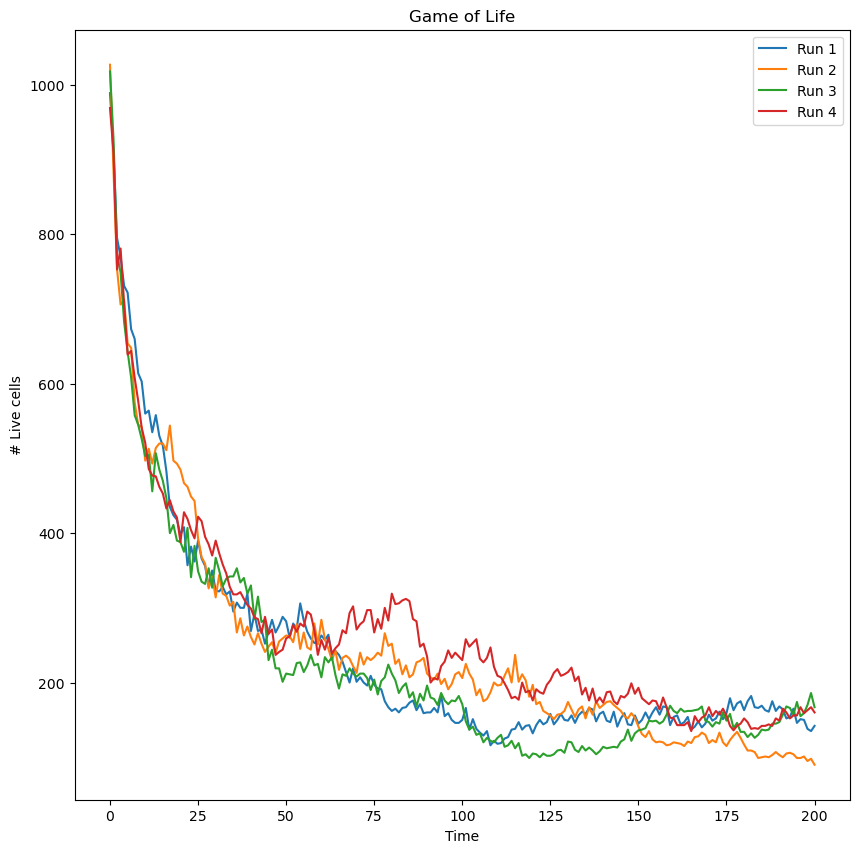

In [39]:
plt.figure(figsize=(10,10))

for i, cells in enumerate(runs):
    live_cell_counts = count_live_cells(cells)
    
    plt.plot(live_cell_counts, label='Run {:}'.format(i+1))
    
plt.xlabel('Time')
plt.ylabel('# Live cells')
plt.title('Game of Life')

plt.legend()